<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Multilple_Linear_Regression_(Cars_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression (MLR)**

# Importing Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [115]:
#read data
df = pd.read_csv("/content/Cars.csv")

In [116]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# EDA

In [117]:
#independent features : HP.SP,VOL,WT
#dependent features   :MPG

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [119]:
#describe the dataframe
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


<Figure size 1000x1000 with 0 Axes>

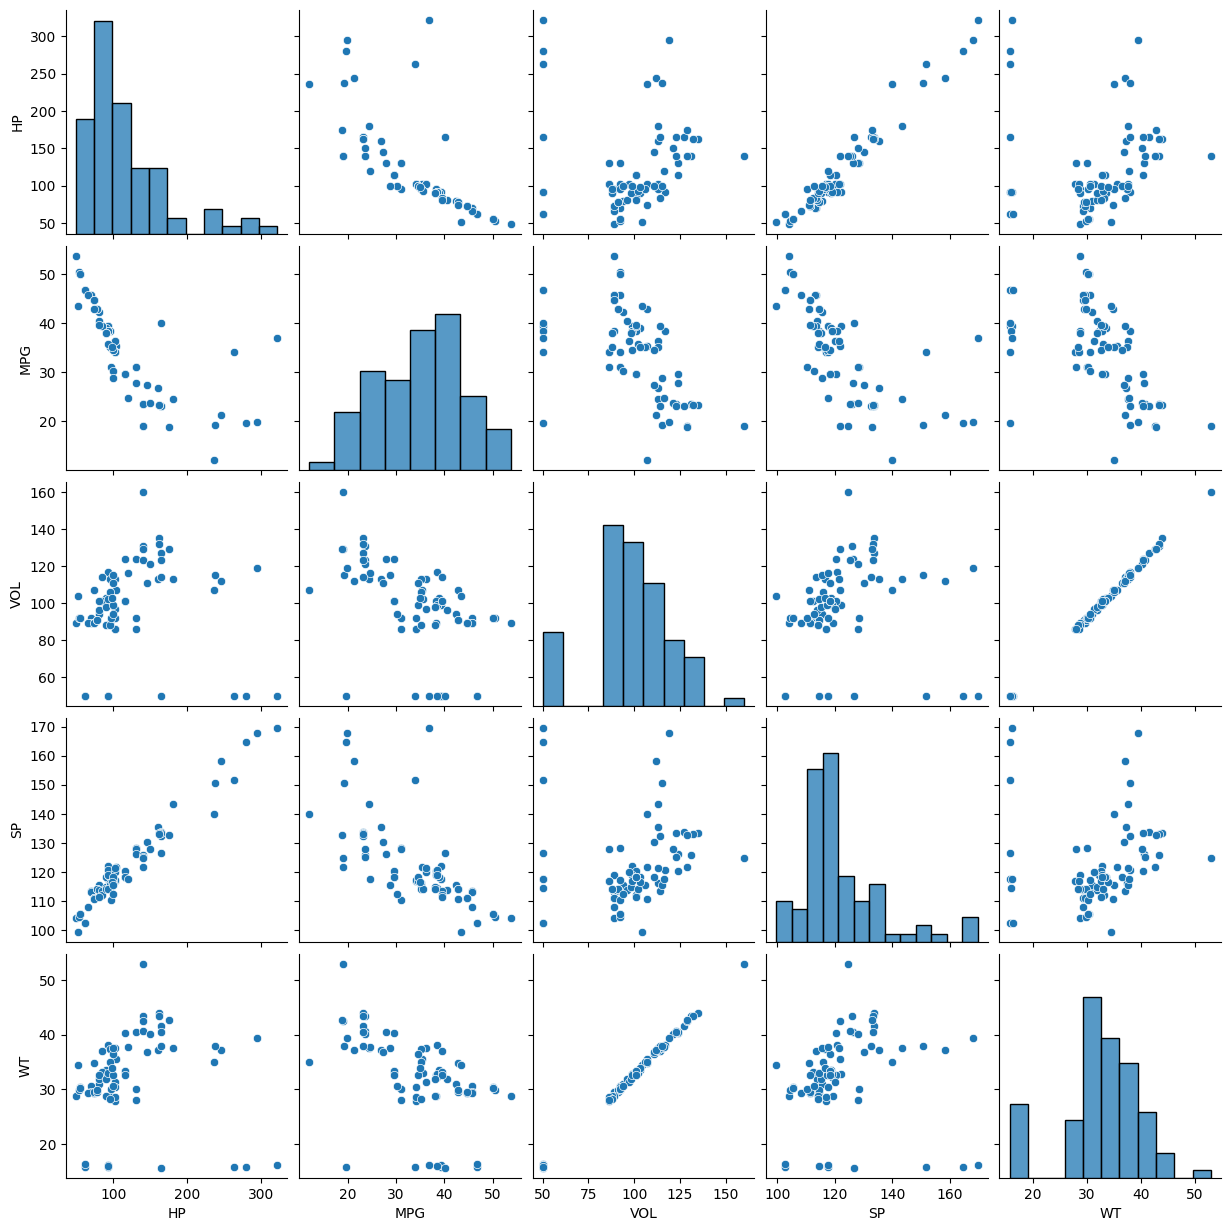

In [120]:
#pairplot
plt.figure(figsize=(10,10))
sns.pairplot(df)

array([[<Axes: title={'center': 'HP'}>, <Axes: title={'center': 'MPG'}>],
       [<Axes: title={'center': 'VOL'}>, <Axes: title={'center': 'SP'}>],
       [<Axes: title={'center': 'WT'}>, <Axes: >]], dtype=object)

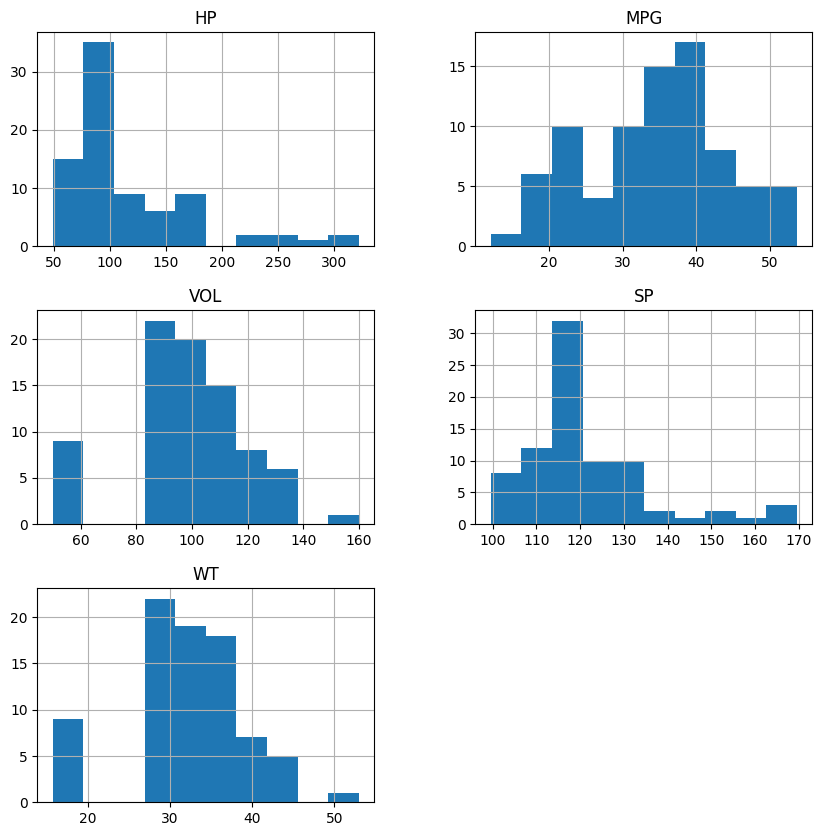

In [121]:
#distribution of the data
df.hist(figsize=(10,10))

In [122]:
#range of corr : (-1 to 1)
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: >

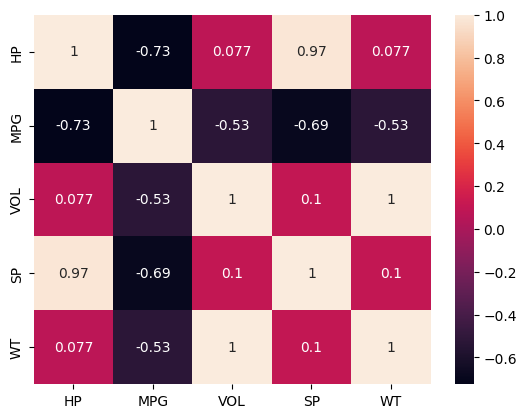

In [123]:
#heatmap of correlation
sns.heatmap(df.corr(),annot=True)

white -> Strong positive correlation

black -> Negative correlation

red   -> No correlation

<Axes: >

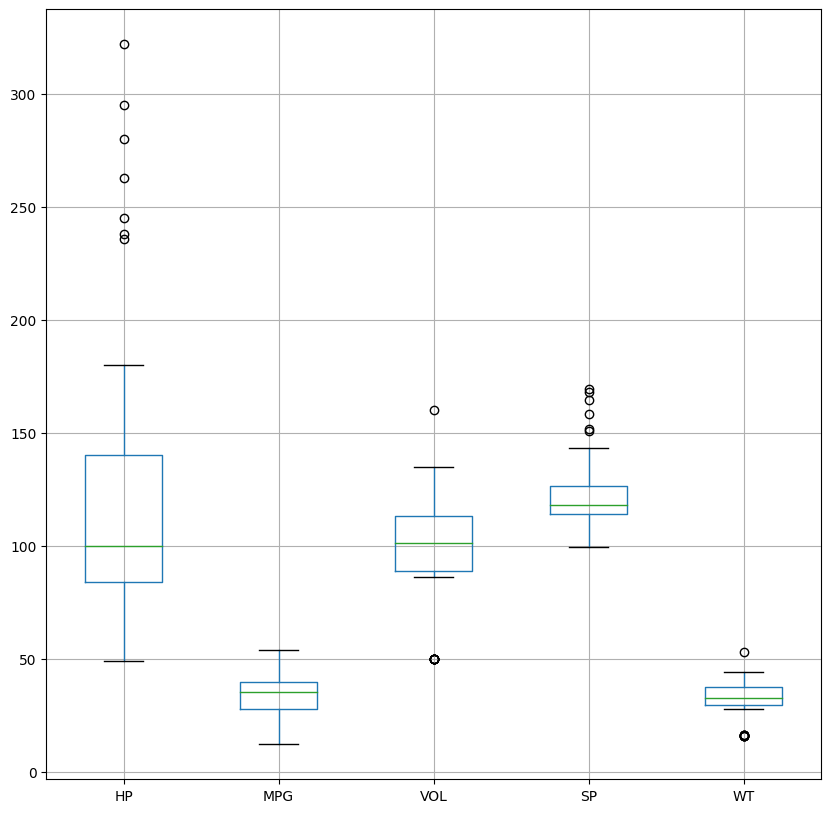

In [124]:
#boxplot
df.boxplot(figsize=(10,10))

<ipython-input-125-5fd5dcf992bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MPG'])


<Axes: xlabel='MPG', ylabel='Density'>

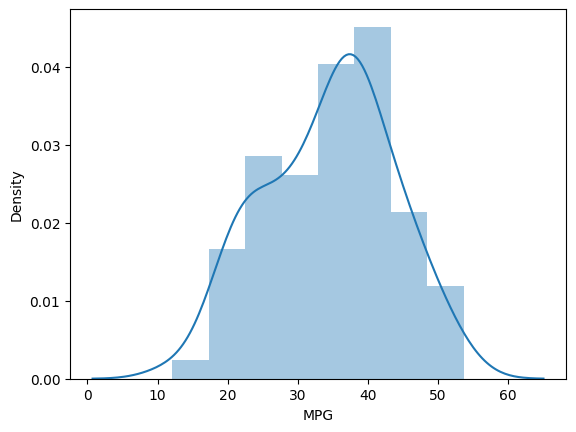

In [125]:
#Distribution plot for 'MPG'
sns.distplot(df['MPG'])

<ipython-input-126-6065a9817a2b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['VOL'])


<Axes: xlabel='VOL', ylabel='Density'>

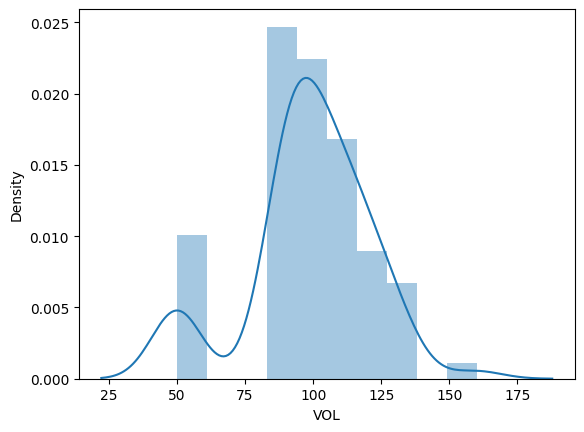

In [126]:
sns.distplot(df['VOL'])

In [127]:
#checking missing/NULL values
df.isnull().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


# Model Building

In [128]:
model = smf.ols('MPG~WT+HP+SP+VOL',data=df).fit()

In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.54e-23
Time:                        07:45:52   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
#Simple linear regression models using 'VOL' and 'WT'
#To check they correlates with dependent variable 'MPG'?

In [131]:
# VOL
model_VOL = smf.ols('MPG~VOL',data=df).fit()

In [132]:
model_VOL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           3.82e-07
Time:                        07:45:52   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
model_VOL.pvalues

,0
Intercept,2.753815e-23
VOL,3.822819e-07


In [134]:
# model_VOL is contributing in prediction of 'MPG'

In [135]:
# WT
model_WT = smf.ols('MPG~WT',data=df).fit()

In [136]:
model_WT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           4.38e-07
Time:                        07:45:52   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
model_WT.pvalues

,0
Intercept,1.550788e-23
WT,4.383467e-07


In [138]:
# model_WT is also contributing in prediction of 'MPG'

In [139]:
# VOL + WT
model_VW =smf.ols('MPG~VOL+WT',data=df).fit()

In [140]:
model_VW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.43e-06
Time:                        07:45:52   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
model_VW.pvalues

,0
Intercept,2.141975e-20
VOL,4.800657e-01
WT,6.255966e-01


In [142]:
# VOL & WT combination not working to prediction of 'MPG'
# VOL + WT together is generating the problems of collinearity

# Measuring collinearity methods for model

1. Variance Inflation Factor (VIF):

 The most common way to detect multicollinearity is by using the variance inflation factor (VIF), which measures the correlation and strength of correlation between the predictor variables in a regression model.

 A high VIF indicates a high correlation between variables in the model.

 So ; For GOOD MODEL  we choose varible with LOW VIF SCORE.

 VIF = 1 / (1 - R^2 )


2. Subset selection:

 Based on R^2(Accuracy)  -> It should be HIGH

 Based on AIC score      -> It should be LOW

In [143]:
#VIF FOR 'VOL'

m1 = smf.ols('VOL~WT+HP+SP',data=df).fit()
rs_vol = m1.rsquared
vif_vol = 1/(1 - rs_vol)
vif_vol

638.8060836592878

In [144]:
#VIF FOR 'WT'

m2 = smf.ols('WT~VOL+HP+SP',data=df).fit()
rs_wt = m2.rsquared
vif_wt = 1/(1 - rs_wt)
vif_wt

639.5338175572624

In [145]:
#VIF FOR 'HP'

m3 = smf.ols('HP~WT+VOL+SP',data=df).fit()
rs_hp = m3.rsquared
vif_hp = 1/(1 - rs_hp)
vif_hp

19.92658897499852

In [146]:
#VIF FOR 'SP'

m4 = smf.ols('SP~WT+VOL+HP',data=df).fit()
rs_sp = m4.rsquared
vif_sp = 1/(1 - rs_sp)
vif_sp

20.00763878305008

In [147]:
#converting variables and VIF score to dictinary
d1 = {'Variables':['HP','WT','VOL','SP'], 'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}

In [148]:
d1

{'Variables': ['HP', 'WT', 'VOL', 'SP'],
 'VIF': [19.92658897499852,
  639.5338175572624,
  638.8060836592878,
  20.00763878305008]}

In [149]:
#converting dict to dataframe
vif = pd.DataFrame(d1)
vif

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


VIF score of  'VOL'  is lower than 'WT'. So, 'VOL' is better choice than 'WT' for good model.

In [150]:
# VOL + HP + SP

mod1 = smf.ols('MPG~VOL+HP+SP',data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.56e-24
Time:                        07:45:52   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
# WT + HP + SP

mod2 = smf.ols('MPG~WT+HP+SP',data=df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.81e-24
Time:                        07:45:52   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
SP             0.4078      0.156      2.609      0.011       0.097       0.719
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
print(mod1.rsquared)
print(mod1.rsquared_adj)
print(mod1.aic)

0.770368341321302
0.7614216533208333
475.9875158854609


In [153]:
print(mod2.rsquared)
print(mod2.rsquared_adj)
print(mod2.aic)

0.769482813998346
0.7605016249333465
476.2992750152976


R2 (VOL) > R2 (WT)

AIC (VOL) < AIC (WT)

So, 'VOL'(mod1) is better choice in model bulding.

# Model Validation/Checking Normality

Text(0.5, 1.0, 'QQ Plot')

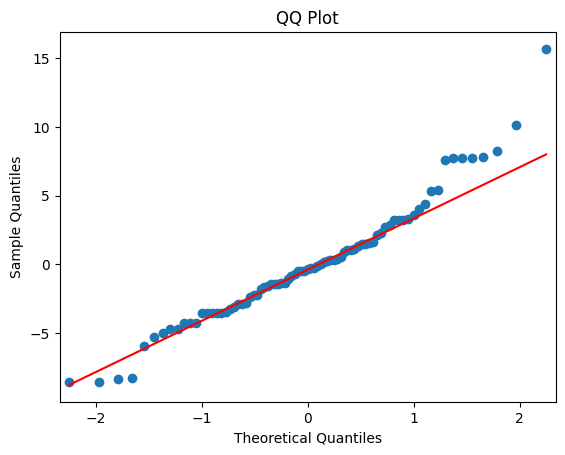

In [154]:
#QQ PLOT
qqplot = sm.qqplot(mod1.resid,line='q')
plt.title('QQ Plot')

Maximum datapoints have normal behaviour which follwing red line.

In [155]:
#Standardized values for both residuls and fitted values

def standardized(v):
  eqn = (v - v.mean())/v.std()
  return eqn

Text(0, 0.5, 'Standardized residulas')

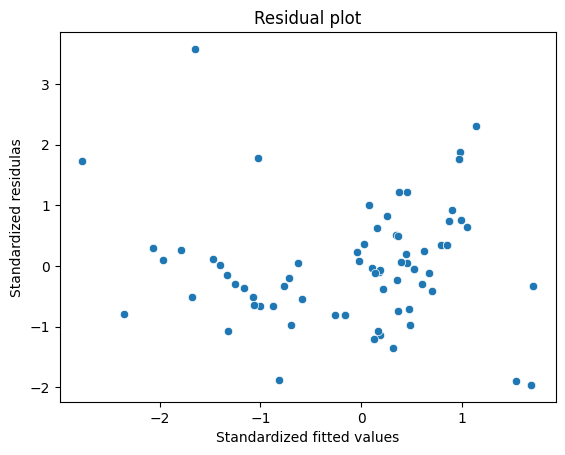

In [156]:
#Residual plot
sns.scatterplot(x=standardized(mod1.fittedvalues),y=standardized(mod1.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residulas')

No patterns,No Relation,No problems.So our model is 'Good Model'

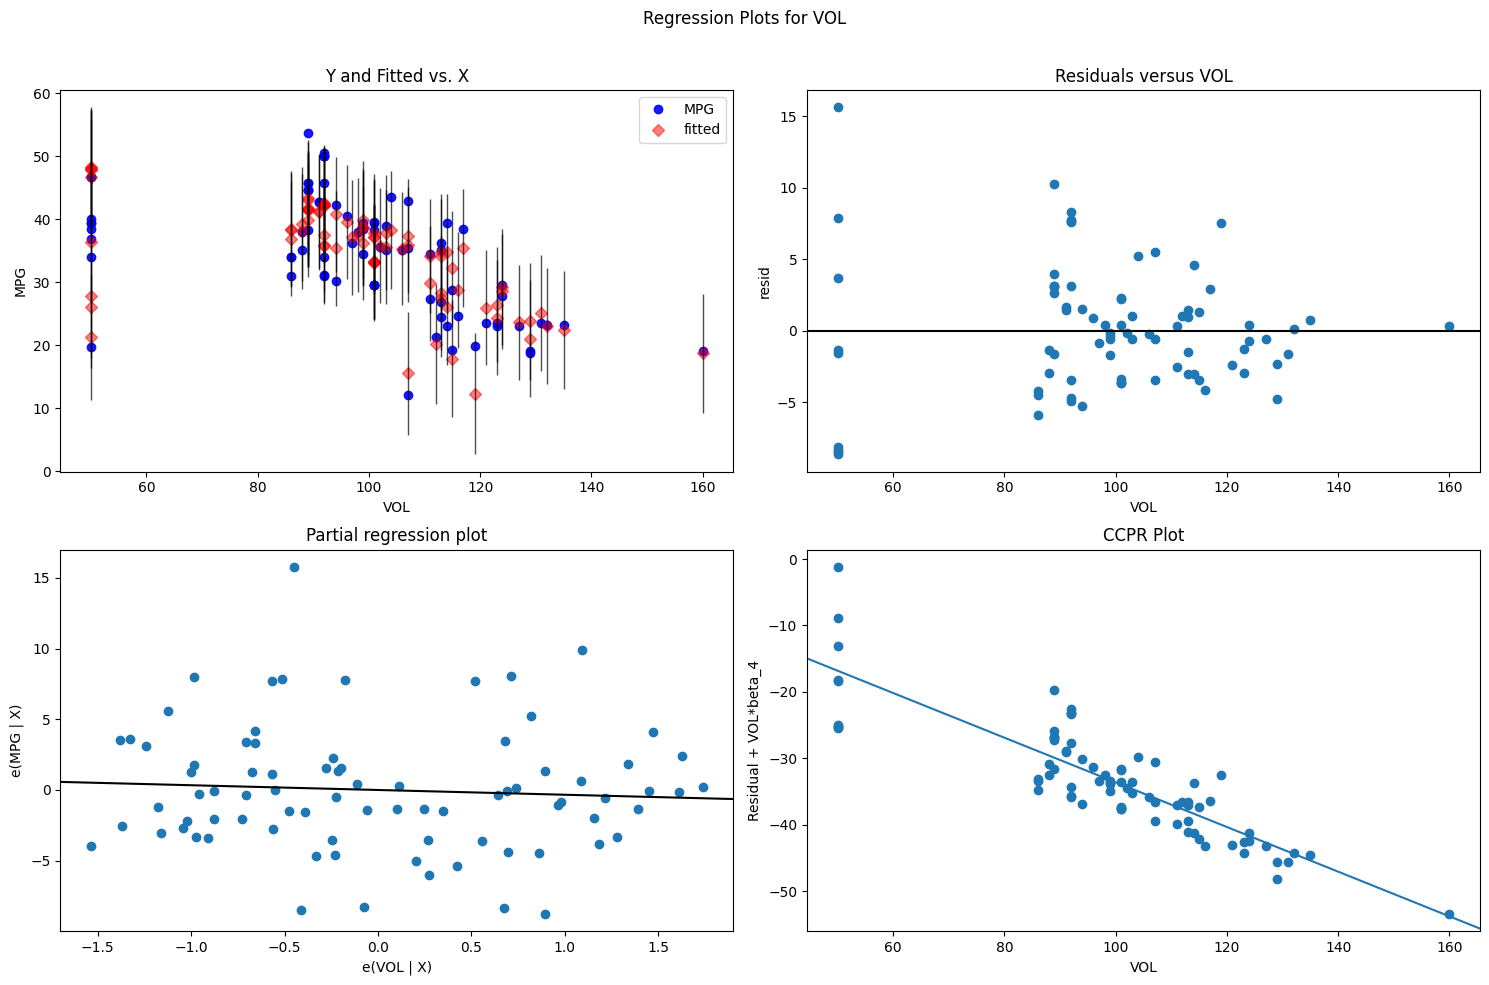

In [157]:
#residuls v/s regressors
fig =plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

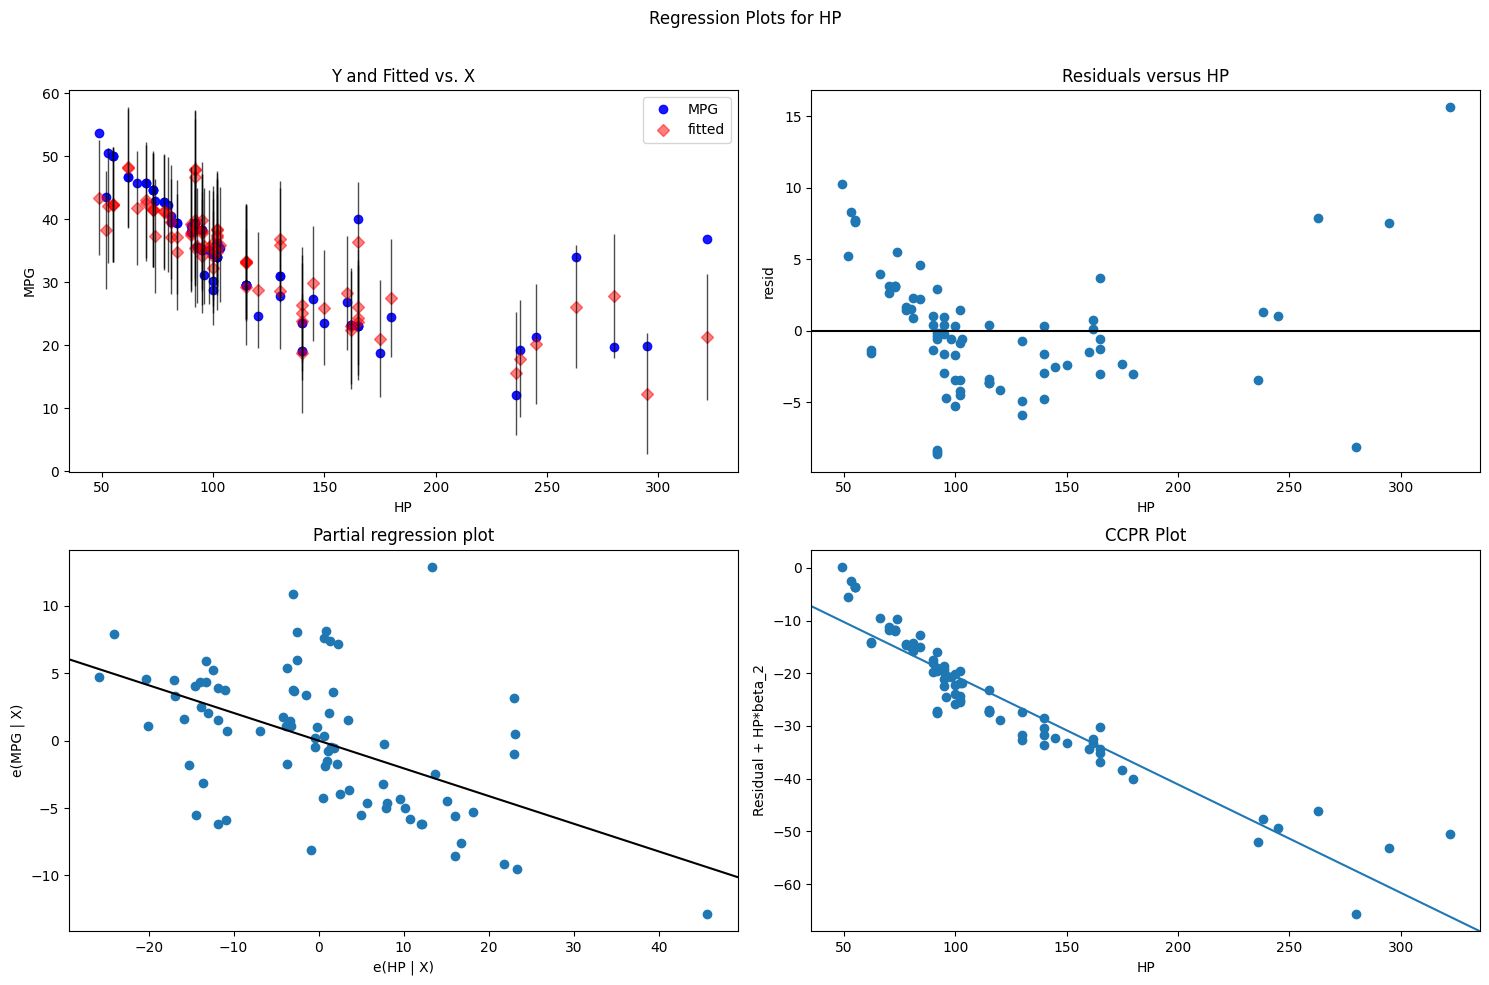

In [158]:
#residuls v/s regressors
fig =plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

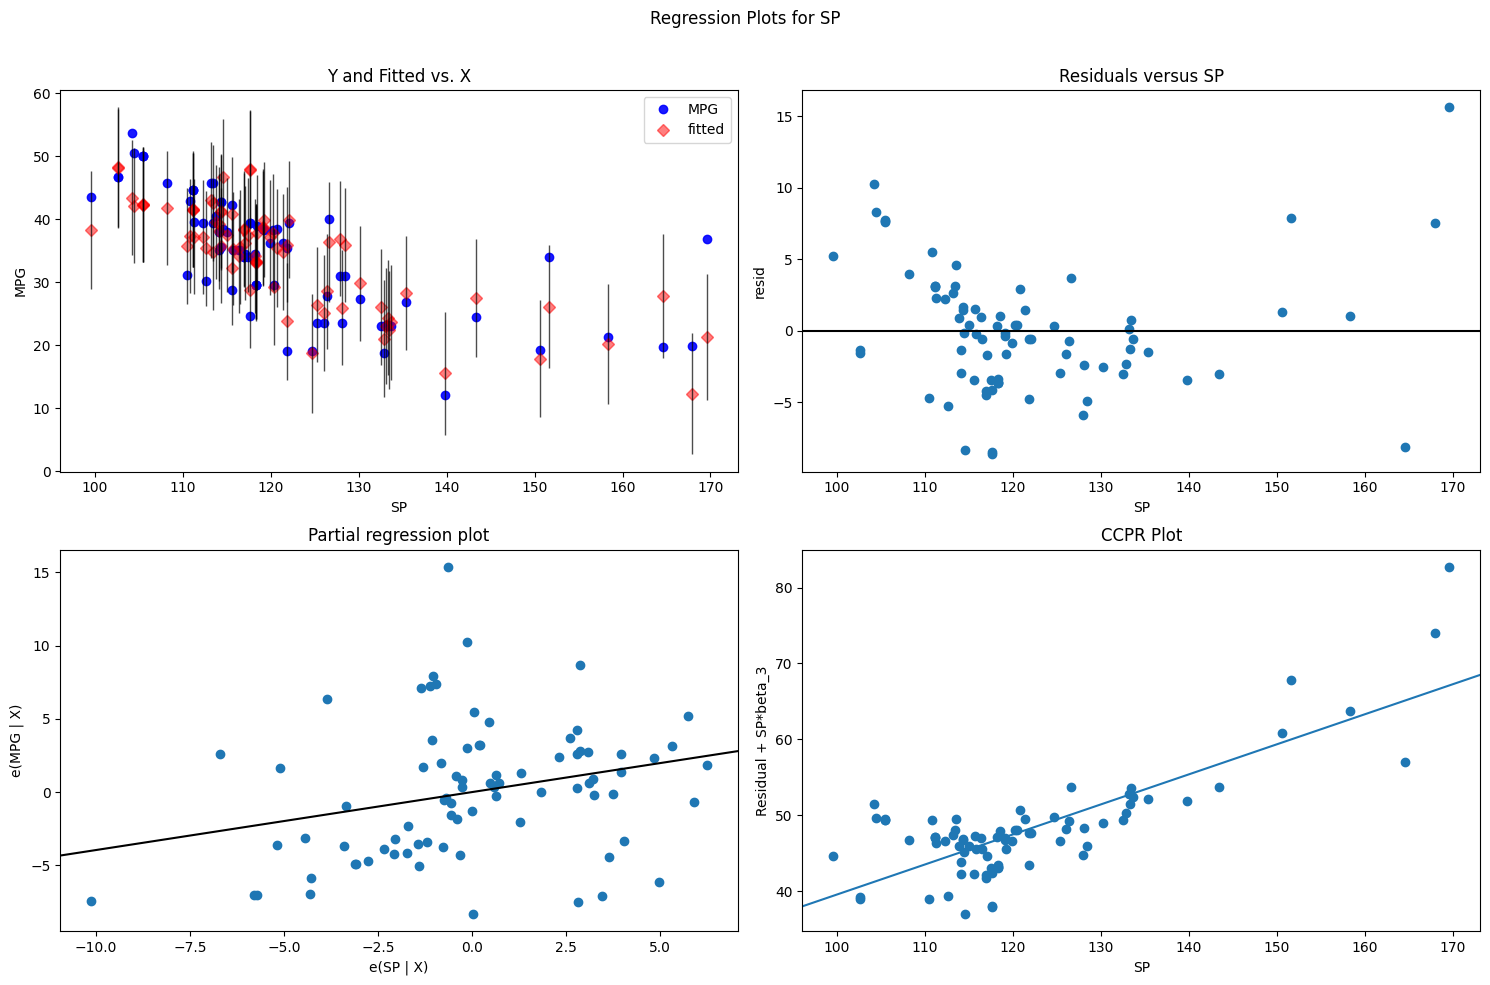

In [159]:
#residuls v/s regressors
fig =plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

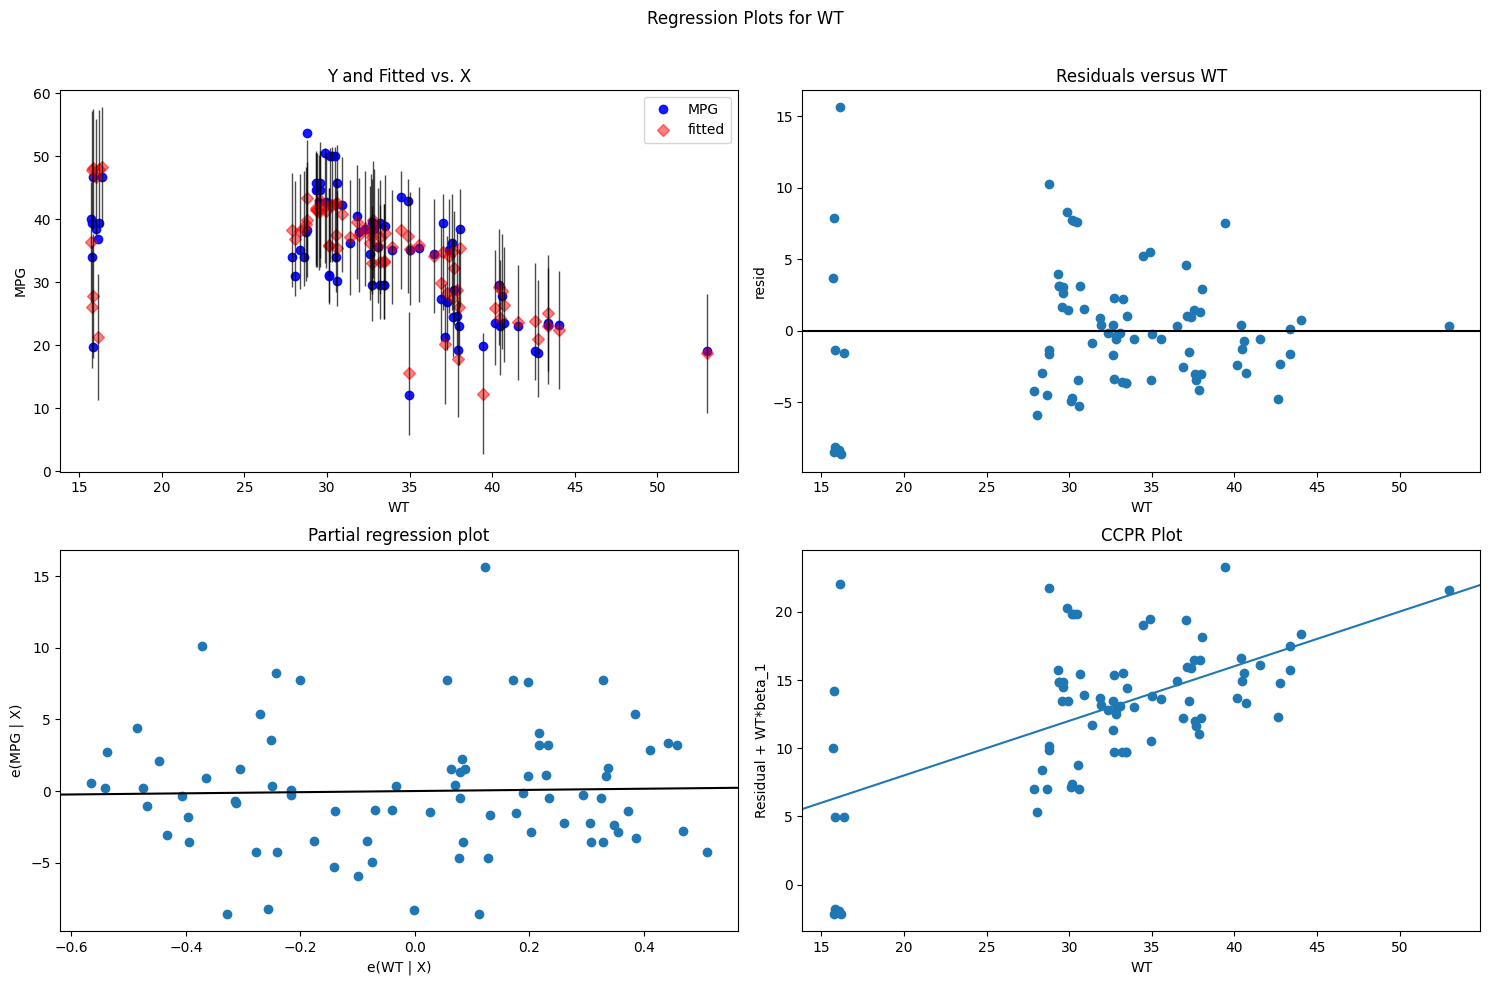

In [160]:
#residuls v/s regressors
fig =plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

# Model Deletion diagnostic

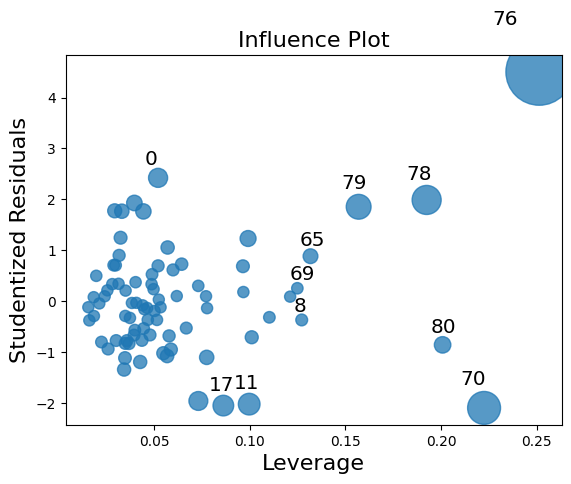

In [161]:
#Influence plot -(detecting rowwise influence/outliers)
#model=MPG ~ WT+HP+SP+VOL

influence_plot(model)
plt.show()

In [162]:
df.shape

(81, 5)

In [163]:
k = df.shape[1]  #No. of features
n = df.shape[0]  #No. of rows/observations

leverage_cutoff = 3*((k+1)/n)

In [164]:
leverage_cutoff

0.2222222222222222

In [165]:
#Retaining original dataframe where multicollinearity was not handled

df1 = pd.read_csv('/content/Cars.csv')

In [166]:
#model : MPG~VOL+HP+SP
#Drop 70 and 76 observation

df1 = df1.drop(df1.index[[70,76]],axis=0).reset_index()

In [167]:
df1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [168]:
df1 = df1.drop('index',axis=1)

In [169]:
df1.shape

(79, 5)

In [170]:
df1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [171]:
#Rebuild model

mv = smf.ols('MPG~SP+HP+VOL',data=df1).fit()

In [172]:
mfv = mv.get_influence()
(cv,_) = mfv.cooks_distance

In [173]:
mfv.cooks_distance

(array([5.53495774e-02, 2.85062799e-02, 2.85062799e-02, 5.34950005e-03,
        3.55869338e-02, 3.79038996e-03, 2.85062799e-02, 1.32771748e-03,
        1.32771748e-03, 7.56691001e-04, 3.33261259e-03, 1.23339926e-01,
        1.14076048e-03, 3.33261259e-03, 6.21782521e-03, 3.33261259e-03,
        7.09472284e-04, 1.23339926e-01, 7.09472284e-04, 1.25650858e-04,
        1.65511111e-04, 1.01187126e-02, 9.35876569e-06, 1.90597263e-04,
        1.71252801e-03, 9.20677227e-02, 4.07373927e-03, 1.65511111e-04,
        4.16239310e-02, 3.31390188e-04, 6.85632716e-03, 1.32756399e-03,
        3.93747165e-04, 7.49398680e-04, 1.27154771e-03, 6.48751557e-06,
        4.76583309e-04, 4.91748288e-03, 4.91748288e-03, 1.49663702e-02,
        1.43677902e-04, 3.71158078e-05, 2.37724155e-03, 2.97638136e-03,
        6.13773416e-05, 6.29555458e-04, 8.19182717e-08, 1.01290206e-04,
        2.15887173e-02, 3.96459368e-03, 3.96459368e-03, 3.96459368e-03,
        3.11686431e-06, 1.13032165e-02, 9.69905045e-04, 5.960591

In [174]:
#1st array - > Actual cooks distance
#2nd array - > Probability

<StemContainer object of 3 artists>

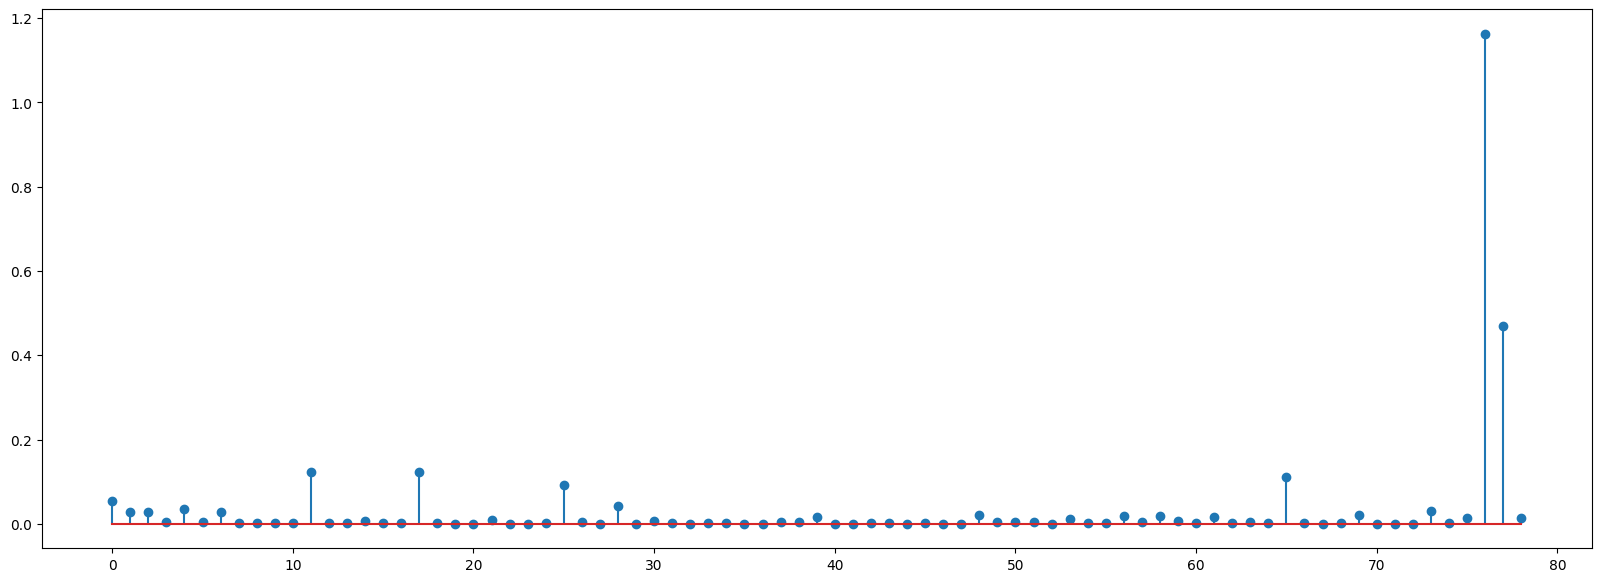

In [175]:
#stem plot
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [176]:
#Which obs is holding max value of cooks distance
#If cooks distance(cv) > 1 ,drop the observation

(np.argmax(cv),np.max(cv))

(76, 1.1629387469135195)

In [177]:
df1.drop(df1.index[76],axis=0,inplace=True)
df1 = df1.reset_index()

In [178]:
df1.head()

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149


In [179]:
df1.drop('index',axis=1,inplace=True)

In [180]:
#Rebuild model

mv1 = smf.ols('MPG~SP+HP+VOL',data=df1).fit()

In [181]:
mfv = mv1.get_influence()
(cv,_) = mfv.cooks_distance

<StemContainer object of 3 artists>

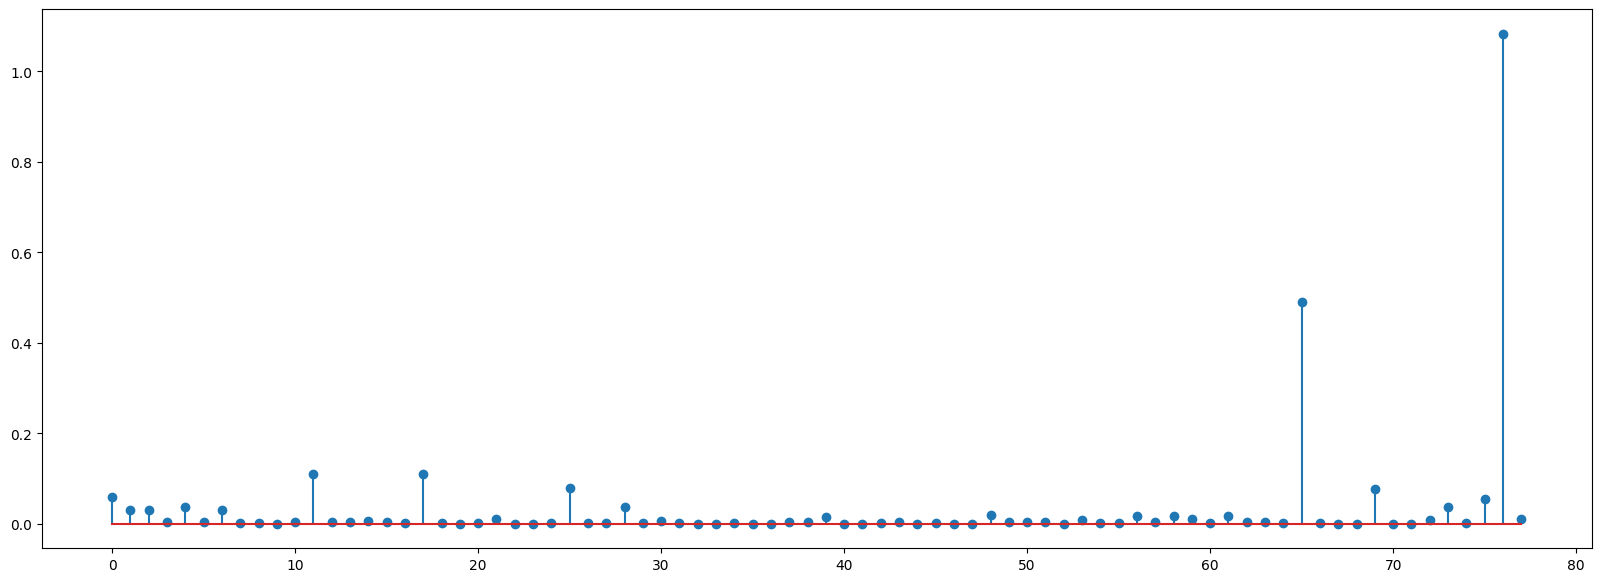

In [182]:
#stem plot
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [183]:
#Checking MAX cooks distance
(np.argmax(cv),np.max(cv))

(76, 1.0834592065958568)

In [184]:
df1.drop(df1.index[76],axis=0,inplace=True)
df1 = df1.reset_index()

In [185]:
df1.head()

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149


In [186]:
df1.drop('index',axis=1,inplace=True)

In [187]:
#Rebuild model

mv2 = smf.ols('MPG~SP+HP+VOL',data=df1).fit()

In [188]:
mfv = mv2.get_influence()
(cv,_) = mfv.cooks_distance

<StemContainer object of 3 artists>

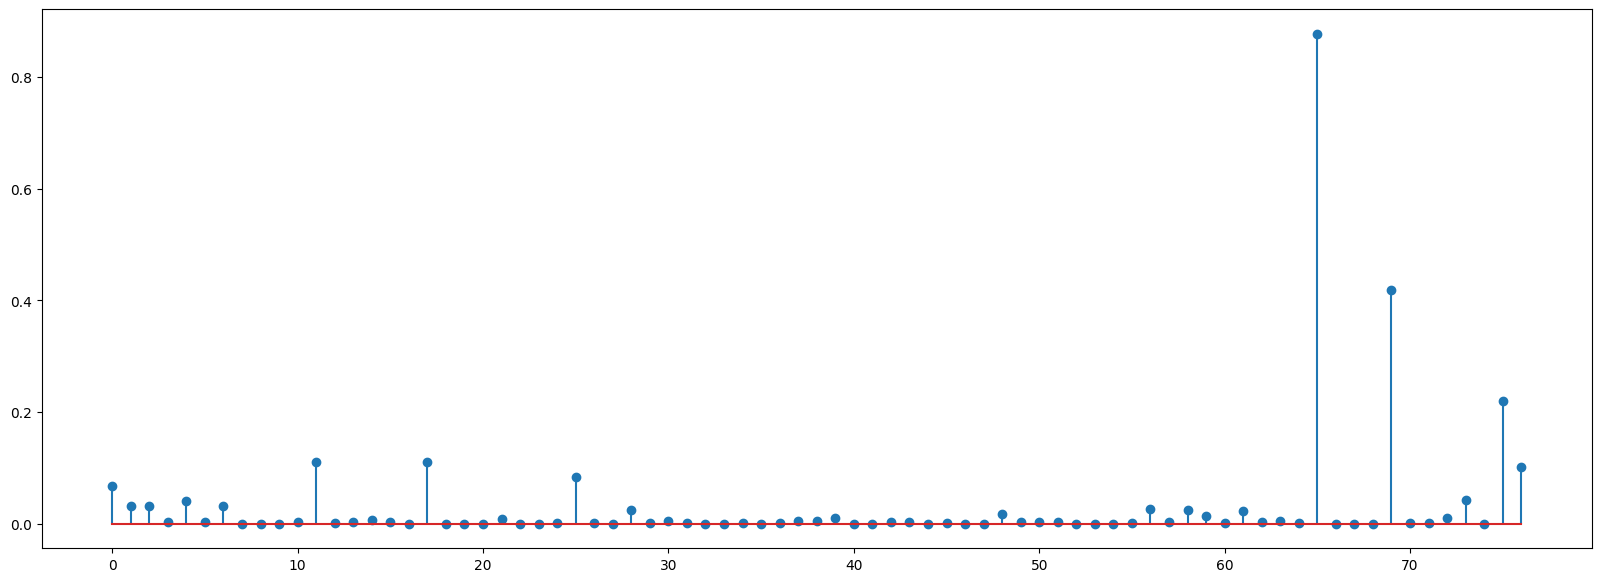

In [189]:
#stem plot
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [190]:
# Checking maximum cooks distance
(np.argmax(cv),np.max(cv))

(65, 0.8774556986296729)

In [191]:
#Now, cooks distance(cv) NOT greater than 1, so there is NOT any outliers.
#we can stop the diagnostics and build the final model

In [192]:
Final_model = smf.ols('MPG~VOL+HP+SP',data=df1).fit()

In [193]:
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           6.81e-32
Time:                        07:46:00   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
SP             0.4335      0.122      3.560      0.001       0.191       0.676
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
df1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [195]:
#Inserting new data for prediction
#model will predict value of of 'MPG'  based on 'VOL','HP','SP' and ignores 'WT'.

new = pd.DataFrame({'HP':18,'VOL':95,'SP':102,'WT':30},index=[1])
new

,HP,VOL,SP,WT
1,18,95,102,30


In [196]:
Final_model.predict(new)

,0
1,51.832414


In [197]:
#Predicted MPG value
Final_model.predict(df)

,0
0,45.428872
1,43.992392
2,43.992392
3,43.508150
4,44.085858
5,43.797196
6,43.992392
7,46.628112
8,46.628112
9,41.547568


In [198]:
#Predicted MPG value
Final_model.fittedvalues

,0
0,45.428872
1,43.992392
2,43.992392
3,43.508150
4,44.085858
5,43.797196
6,43.992392
7,46.628112
8,46.628112
9,41.547568


In [199]:
#Original values
df['MPG']

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
5,45.696322
6,50.013401
7,46.716554
8,46.716554
9,42.299078


In [200]:
#error values
Final_model.resid

,0
0,8.271810
1,6.021010
2,6.021010
3,2.188173
4,6.418374
5,1.899126
6,6.021010
7,0.088442
8,0.088442
9,0.751510


In [201]:
#Our Final_model is ready with almost 87% accuracy.